In [ ]:
# pip install tensorflow mediapipe scikit-learn matplotlib
# !pip install --upgrade mediapipe


Importing Necessary library for Gesture Recognition

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from mediapipe.python.solutions import holistic
import tensorflow as tf

2024-02-15 08:52:35.876752: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-15 08:52:36.696334: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 08:52:36.696424: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 08:52:36.831652: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-15 08:52:37.142206: I tensorflow/core/platform/cpu_feature_guar

In [2]:
mp_drawing=mp.solutions.drawing_utils   #holistic model
mp_holistic=mp.solutions.holistic       #drawing utilities

In [3]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  #color conversion BGR to RGB
    image.flags.writeable = False                   #Image is no longer writeable
    results = model.process(image)                  # make prediction
    image.flags.writeable = True                    #image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  #color conversion again RGB to BGR
    return image,results

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)  # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)  # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #Draw right hand connections

def draw_style_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(175,13,13), thickness=1, circle_radius=1),   #color dot
                              mp_drawing.DrawingSpec(color=(0,0,0), thickness=1, circle_radius=1)    #color line
                              )
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(178,16,16), thickness=2, circle_radius=4),   #color dot
                              mp_drawing.DrawingSpec(color=(0,0,0), thickness=2, circle_radius=2)    #color line
                              )
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(0,0,0), thickness=2, circle_radius=1),   #color dot
                              mp_drawing.DrawingSpec(color=(255,255,255), thickness=2, circle_radius=2)    #color line
                              )
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(255,255,255), thickness=2, circle_radius=1),   #color dot
                              mp_drawing.DrawingSpec(color=(0,0,0), thickness=2, circle_radius=2)    #color line
                              )


In [ ]:
# pip install --upgrade mediapipe

In [ ]:
# mp_holistic.POSE_CONNECTIONS
# mp_holistic.HAND_CONNECTIONS
# mp_holistic.FACEMESH_TESSELATION

In [ ]:
# mp_drawing.draw_landmarks??

In [4]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    # Read feed
    ret,frame=cap.read()
    #make detections
    image, results= mediapipe_detection(frame, holistic)
    print(results)

    # Draw landmarks
    # draw_landmarks(image, results)  #default landmarks in face hand 

    draw_style_landmarks(image, results) #customized landmarks in face and hand
    #show to screen
    cv2.putText(image,"Starting collecting", (120,200), #display message in screen at position x=120 and y=200
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,225,0), 4, cv2.LINE_AA) 
    # Flip the image horizontally
    image = cv2.flip(image, 1)
    cv2.imshow('OPENCV FEED',image)

    if cv2.waitKey(10) & 0xFF==ord('q'):
      break
  cap.release()
  cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
# results.left_hand_landmarks.landmark

In [59]:
# results

mediapipe.python.solution_base.SolutionOutputs

In [ ]:
# frame

In [94]:
# draw_landmarks(frame, results)

In [ ]:
# plt.imshow(frame)
# plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [50]:
# results.left_hand_landmarks.landmark
# len(results.pose_landmarks.landmark)
# len(results.face_landmarks.landmark)
# results.right_hand_landmarks.landmark

33

In [7]:
# pose = []
# for res in results.pose_landmarks.landmark:
#     test = np.array([res.x,res.y,res.z,res.visibility])
#     pose.append(test)

In [ ]:
# pose

In [58]:
# pose = np.array([[res.x,res.y,res.y,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
# face = np.array([[res.x,res.y,res.y] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
# lh = np.array([[res.x,res.y,res.y] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
# rh = np.array([[res.x,res.y,res.y] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [ ]:
# face

In [35]:
# np.zeros(21*3).shape

(63,)

In [4]:
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.y,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x,res.y,res.y] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x,res.y,res.y] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x,res.y,res.y] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [ ]:
# result_test=extract_keypoints(results)  #keypoint in result_test

In [ ]:
# np.save('0',result_test) #saving file

In [ ]:
# np.load('0.npy') #display here file

In [61]:
# extract_keypoints(results).shape

(1662,)

In [5]:
#path for exported data, numpy arrays
DATA_PATH = os.path.join('/home/mahimrawal/Frame_Data')
# IMAGES_PATH= os.path.join('Frame_collection')
#action that we are creating and detect
actions=np.array(['Aausadi','Ambulance','Bathroom','Be Careful','Bleeding','Call','Dhanebad','Doctor','Dont Understand','Eklopan',
                  'Emergency','Firstaid','Good Morning','Happy','Heart_attack','Hello','Help','Hospital','Name','Need','Nice To Meet You',
                  'Oxygen','Pain','Please','Police','Relax','Sign','Slowly','Sorry','What','Yes','You'])

#thirty videos worth of data
no_sequences = 50

#videos are going to be 60 frames in length
sequence_length = 60

In [14]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
            # os.makedirs(os.path.join(IMAGES_PATH,action,str(sequence)))
        except:
            pass


In [8]:
cap=cv2.VideoCapture(0)
#setup mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
  
# loop through actions
  for action in actions:
        # loop through sequences
        for sequence in range(no_sequences):
            # loop through number of sequences length
            for frame_num in range(sequence_length):
        # Read feed
                ret,frame=cap.read()
                #make detections
                image, results= mediapipe_detection(frame, holistic)
                # print(results)

                # Draw landmarks
                # draw_landmarks(image, results)  #default landmarks in face hand 
                draw_style_landmarks(image, results) #customized landmarks in face and hand
                

                if frame_num == 0:
                    cv2.putText(image,"Starting collecting", (120,200), #display message in screen at position x=120 and y=200
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,225,0), 4, cv2.LINE_AA) #using font style 1=size (0,255,0)=color and 4=line width
                    cv2.putText(image,'Collecting frames for {}'.format(action,sequence),(15,12), #same
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),1, cv2.LINE_AA) #same
                    # image = cv2.flip(image, 1)
                    cv2.imshow('OPENCV FEED',image)
                    cv2.waitKey(2000) #break for each video
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action,sequence),(15,12), #same for if frame_num!=0
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),1,cv2.LINE_AA)
                    # image = cv2.flip(image, 1)
                    cv2.imshow('OPENCV FEED',image)
                    

                #exporting keypoints in respective folders
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path,keypoints)


                
                # Save frames as jpg in respective folders
                img_path = os.path.join(IMAGES_PATH, action, str(sequence), str(frame_num) + '.jpg')
                cv2.imwrite(img_path, image)
                #show to screen
                # print("frame_num:", frame_num)


                key = cv2.waitKey(10)
                if key == ord('q') or key == ord('Q'):
                    cap.release()
                    cv2.destroyAllWindows()
                    raise SystemExit("Program terminated by user")  # Raise SystemExit to exit gracefully

                # if cv2.waitKey(10) & 0xFF==ord('q') or 0xFF==ord('Q'):  #for quiting program
                #     break
                
                
  cap.release()
  cv2.destroyAllWindows()

In [61]:
cap.release()
cv2.destroyAllWindows()

In [49]:
# len(np.load("MP_Data/hello/0/0.npy"))

1662

In [6]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [7]:
label_map= {label:num for num, label in enumerate(actions)}

In [8]:
label_map

{'Aausadi': 0,
 'Ambulance': 1,
 'Bathroom': 2,
 'Be Careful': 3,
 'Bleeding': 4,
 'Call': 5,
 'Dhanebad': 6,
 'Doctor': 7,
 'Dont Understand': 8,
 'Eklopan': 9,
 'Emergency': 10,
 'Firstaid': 11,
 'Good Morning': 12,
 'Happy': 13,
 'Heart_attack': 14,
 'Hello': 15,
 'Help': 16,
 'Hospital': 17,
 'Name': 18,
 'Need': 19,
 'Nice To Meet You': 20,
 'Oxygen': 21,
 'Pain': 22,
 'Please': 23,
 'Police': 24,
 'Relax': 25,
 'Sign': 26,
 'Slowly': 27,
 'Sorry': 28,
 'What': 29,
 'Yes': 30,
 'You': 31}

In [9]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [9]:
import os

sequences, labels = [], []

# Iterate through actions
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    label = label_map[action]

    # Iterate through sequences
    for sequence in range(no_sequences):
        window = []

        # Load all frames of the sequence at once
        sequence_frames = [np.load(os.path.join(action_path, str(sequence), "{}.npy".format(frame_num))) 
                           for frame_num in range(sequence_length)]

        # Append the sequence frames to the window
        window.extend(sequence_frames)

        # Append the window to the sequences list
        sequences.append(window)

        # Append the label to the labels list
        labels.append(label)


In [10]:
np.array(sequences).shape

(1600, 60, 1662)

In [55]:
# np.array(labels).shape

(60,)

In [11]:
X = np.array(sequences)

In [12]:
X.shape

(1600, 60, 1662)

In [13]:
y = to_categorical(labels).astype(int)

In [14]:
y.shape

(1600, 32)

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
from sklearn.model_selection import train_test_split

# Assuming you have X (features) and y (labels)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Now X_train and y_train are the training set, and X_val and y_val are the validation set


In [16]:
print("Length of data in X_train:", len(X_train))
print("Length of data in X_train:", len(X_val))
print("Length of data in X_train:", len(y_train))
print("Length of data in X_train:", len(y_val))


Length of data in X_train: 1200
Length of data in X_train: 400
Length of data in X_train: 1200
Length of data in X_train: 400


In [17]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout,Bidirectional,BatchNormalization
from keras.callbacks import TensorBoard
from keras.regularizers import l2

In [18]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [19]:
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(60,1662)))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax'))


model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(60, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(256, return_sequences=True, activation='relu'))  # Additional LSTM layer
model.add(LSTM(128, return_sequences=False, activation='relu'))
# model.add(LSTM(64, return_sequences=True, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(128, activation='relu'))  # Additional Dense layer
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(60, 1662)))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))  # Adding dropout to prevent overfitting
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))  # Adding dropout to prevent overfitting
# model.add(Dense(actions.shape[0], activation='softmax'))


# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Bidirectional, Dropout, BatchNormalization

# model = Sequential()
# model.add(Bidirectional(LSTM(128, return_sequences=True, activation='relu'), input_shape=(60, 1662)))
# model.add(Bidirectional(LSTM(264, return_sequences=True, activation='relu')))
# model.add(LSTM(128, return_sequences=False, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))  # Adjust dropout rate based on experimentation
# model.add(BatchNormalization())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
#C
# model.add(Dense(actions.shape[0], activation='softmax'))


2024-02-15 08:55:50.503089: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38374 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capability: 8.0
2024-02-15 08:55:51.510406: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [20]:
res = [0.6,1.5,0.5]

In [21]:
np.argmax(res)


1

In [20]:
[actions.shape[0]]


[32]

In [26]:
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])



In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 60, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 60, 256)           394240    
                                                                 
 lstm_3 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8

In [24]:
# from tensorflow.keras import callbacks

# early_stopping = callbacks.EarlyStopping(
#     min_delta = 0.001,
#     patience = 20,
#     restore_best_weights = True
# )

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
# pip install garbage collector

In [23]:
# import garbage as gc
# val = 30
# collections = 25
# default_collections = 23
# gc.collect(val,collections,default_collect)
# tf.keras.backend.clear_session()
# physical_devices = tf.config.list_physical_devices('GPU')
# for device in physical_devices:
#     tf.config.experimental.set_memory_growth(device, True)
# physical_devices

[]

In [28]:
# model.fit(X_train, y_train, epochs=300, callbacks=[tb_callback])
history=model.fit(X_train, y_train, epochs=700, batch_size=128, validation_data=(X_val, y_val), callbacks=[tb_callback])



Epoch 1/700


2024-02-15 09:01:17.025136: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fb640d13d10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-15 09:01:17.025170: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
2024-02-15 09:01:17.056133: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-15 09:01:17.124401: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1707987677.241133    2623 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 [==============================] - 10s 379ms/step - loss: 3.4664 - categorical_accuracy: 0.0217 - val_loss: 3.4652 - val_categorical_accuracy: 0.0425
Epoch 2/700
10/10 [==============================] - 3s 262ms/step - loss: 3.4656 - categorical_accuracy: 0.0375 - val_loss: 3.4647 - val_categorical_accuracy: 0.0450
Epoch 3/700
10/10 [==============================] - 3s 265ms/step - loss: 3.4648 - categorical_accuracy: 0.0367 - val_loss: 3.4644 - val_categorical_accuracy: 0.0475
Epoch 4/700
10/10 [==============================] - 3s 259ms/step - loss: 3.4648 - categorical_accuracy: 0.0358 - val_loss: 3.4640 - val_categorical_accuracy: 0.0650
Epoch 5/700
10/10 [==============================] - 3s 265ms/step - loss: 3.4647 - categorical_accuracy: 0.0392 - val_loss: 3.4633 - val_categorical_accuracy: 0.0700
Epoch 6/700
10/10 [==============================] - 3s 259ms/step - loss: 3.4639 - categorical_accuracy: 0.0400 - val_loss: 3.4624 - val_categorical_accuracy: 0.0700
Epoch 7/7

In [ ]:
# from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# model.fit(X_train, y_train, epochs=500, callbacks=[early_stopping], validation_data=(X_val, y_val))


In [84]:
# res = model.predict(X_train)


2/2 [==============================] - 1s 22ms/step


In [87]:
# actions[np.argmax(y_train[0])]

'thanks'

In [29]:
model.save('combine.h5')


/home/mahimrawal/anaconda3/envs/chippu/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
from keras.models import load_model

# Provide the path to your saved model
model_path = r'/home/mahimrawal/combine.h5'
# model_path = r'C:\Users\Dell\Downloads\1-7.h5'

# Load the model
loaded_model = load_model(model_path)

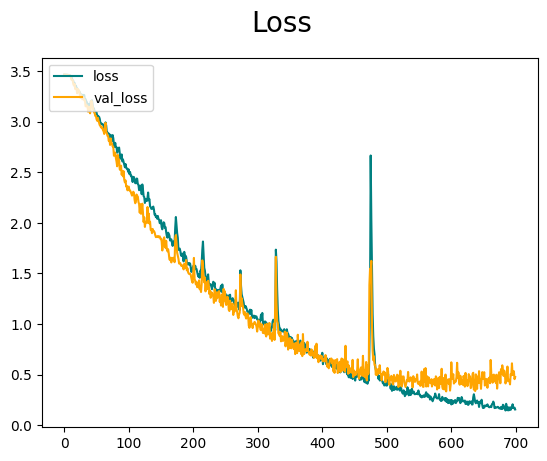

In [30]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

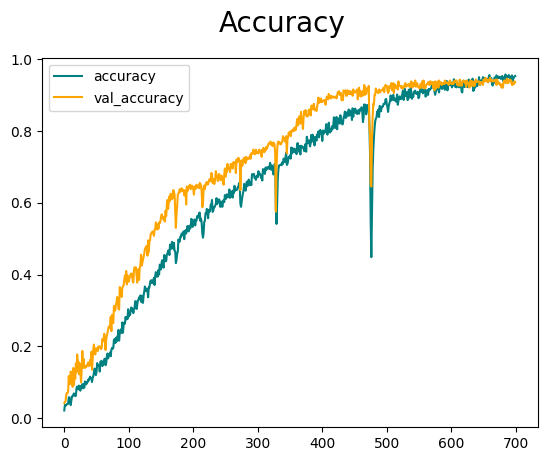

In [31]:
fig = plt.figure()
plt.plot(history.history['categorical_accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_categorical_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [35]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [38]:
# yhat = loaded_model.predict(X_train)
yhat = loaded_model.predict(X_train)

38/38 [==============================] - 2s 41ms/step


In [39]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [40]:
multilabel_confusion_matrix(ytrue,yhat)


array([[[1158,    0],
        [   4,   38]],

       [[1164,    0],
        [   0,   36]],

       [[1161,    0],
        [   1,   38]],

       [[1161,    1],
        [   0,   38]],

       [[1162,    0],
        [   0,   38]],

       [[1164,    0],
        [   0,   36]],

       [[1162,    0],
        [   0,   38]],

       [[1166,    0],
        [   0,   34]],

       [[1161,    1],
        [   1,   37]],

       [[1163,    3],
        [   0,   34]],

       [[1164,    0],
        [   0,   36]],

       [[1165,    1],
        [   2,   32]],

       [[1165,    0],
        [   0,   35]],

       [[1160,    0],
        [   0,   40]],

       [[1162,    0],
        [   0,   38]],

       [[1162,    0],
        [   0,   38]],

       [[1162,    0],
        [   0,   38]],

       [[1159,    0],
        [   1,   40]],

       [[1162,    0],
        [   0,   38]],

       [[1159,    0],
        [   0,   41]],

       [[1159,    1],
        [   0,   40]],

       [[1160,    2],
        [   

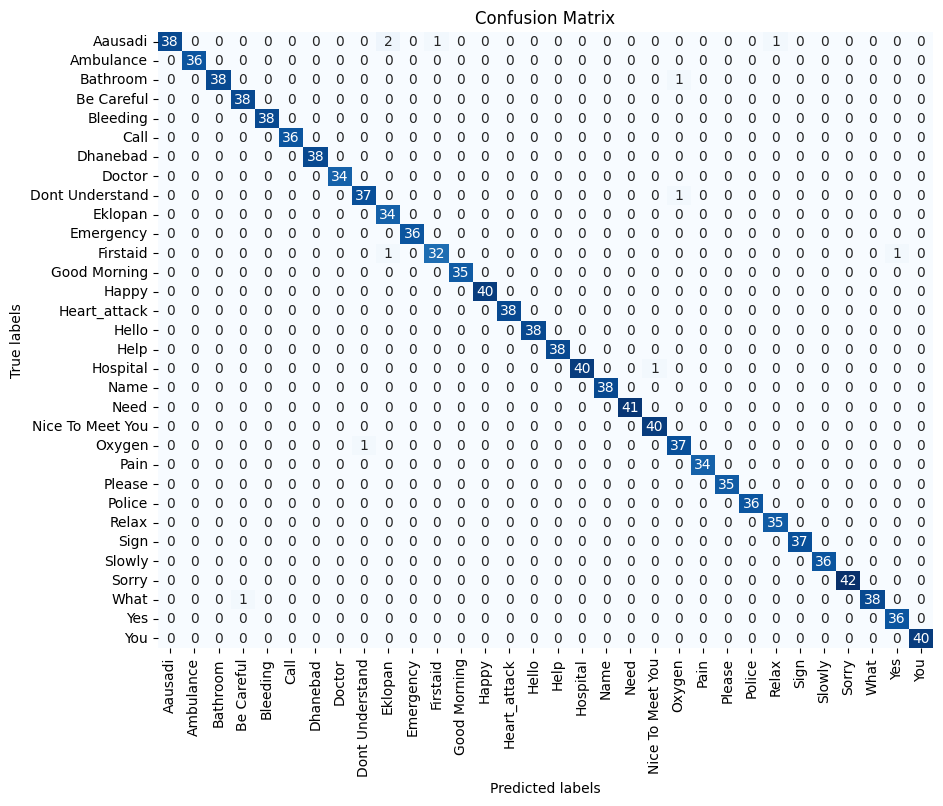

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained your model and obtained predictions
# y_true are the true labels, and y_pred are the predicted labels
# Replace y_true and y_pred with your actual data

# Compute the confusion matrix
conf_matrix = confusion_matrix(ytrue, yhat)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=actions, yticklabels=actions)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [43]:
accuracy_score(ytrue, yhat)


0.9908333333333333

In [45]:
from sklearn.metrics import classification_report

# Compute classification report
class_report = classification_report(ytrue, yhat)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       1.00      1.00      1.00        36
           2       1.00      0.97      0.99        39
           3       0.97      1.00      0.99        38
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        34
           8       0.97      0.97      0.97        38
           9       0.92      1.00      0.96        34
          10       1.00      1.00      1.00        36
          11       0.97      0.94      0.96        34
          12       1.00      1.00      1.00        35
          13       1.00      1.00      1.00        40
          14       1.00      1.00      1.00        38
          15       1.00      1.00      1.00        38
          16       1.00      1.00      1.00        38
    

In [44]:
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and obtained predictions
# y_true are the true labels, and y_pred are the predicted labels
# Replace y_true and y_pred with your actual data

# Compute the confusion matrix
conf_matrix = confusion_matrix(ytrue, yhat)

# Extract values from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate metrics
accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * precision * recall / (precision + recall)
specificity = TN / (TN + FP)
false_positive_rate = 1 - specificity

# Print the parameters and metrics
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Specificity:", specificity)
print("False Positive Rate:", false_positive_rate)


ValueError: too many values to unpack (expected 4)

In [1]:
import tensorflow as tf
tf.keras.utils.image_dataset_from_directory??


2024-02-14 06:12:00.892761: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-14 06:12:00.953058: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-14 06:12:00.953092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-14 06:12:00.954426: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-14 06:12:00.962979: I tensorflow/core/platform/cpu_feature_guar

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [15]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(loaded_model.history['categorical_accuracy'], color='teal', label='categorical_accuracy')
plt.plot(loaded_model.history['val_categorical_accuracy'], color='orange', label='val_categorical_accuracy')
fig.suptitle('Categorical Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


TypeError: 'NoneType' object is not subscriptable

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

if loaded_model.history is not None:
    fig = plt.figure()
    if 'categorical_accuracy' in loaded_model.history and 'val_categorical_accuracy' in loaded_model.history:
        plt.plot(loaded_model.history['categorical_accuracy'], color='teal', label='categorical_accuracy')
        plt.plot(loaded_model.history['val_categorical_accuracy'], color='orange', label='val_categorical_accuracy')
        fig.suptitle('Categorical Accuracy', fontsize=20)
        plt.legend(loc="upper left")
        plt.show()
    else:
        print("History object doesn't contain expected keys.")
else:
    print("History object is None.")


History object is None.


In [14]:
fig = plt.figure()
plt.plot(loaded_model.history['loss'], color='teal', label='loss')
plt.plot(loaded_model.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

TypeError: 'NoneType' object is not subscriptable

<Figure size 640x480 with 0 Axes>

TypeError: 'NoneType' object is not subscriptable

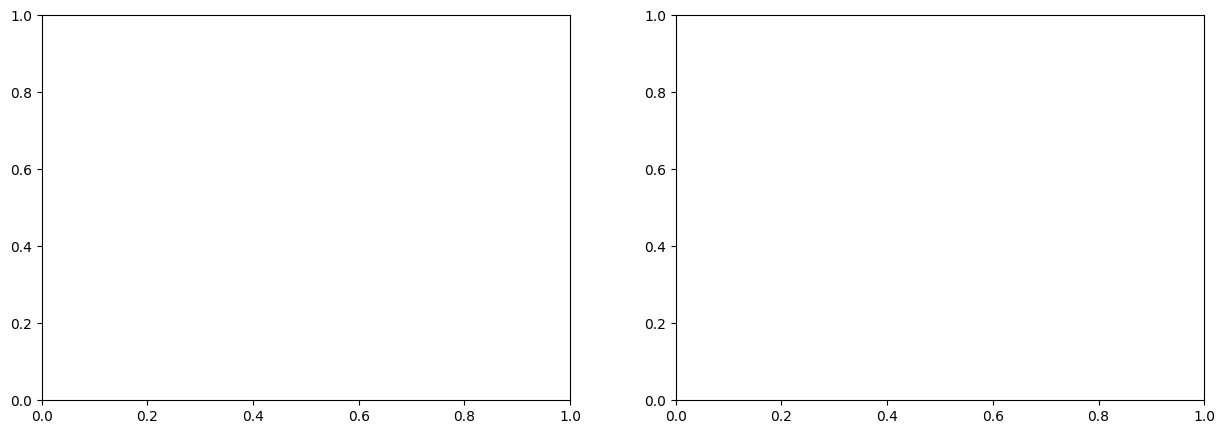

In [13]:
import matplotlib.pyplot as plt
history=loaded_model
# Plot training history
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
axs[0].plot(history.history['categorical_accuracy'])
axs[0].plot(history.history['val_categorical_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'], loc='best')

# Plot loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Validation'], loc='best')

plt.show()


In [35]:
result = model.predict(X_train)
predicted_class = np.argmax(result, axis=1)
true_class = np.argmax(y_train, axis=1)
num_correct = np.sum(predicted_class == true_class) 
accuracy = float(num_correct)/result.shape[0]

40/40 [==============================] - 3s 67ms/step


In [25]:
colors = [(245,117,16),(117,245,16),(16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num,prob in enumerate(res):
        cv2.rectangle(output_frame, (0,30+num*20), (int(prob*50), 45+num*20), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 42+num*20), cv2.FONT_HERSHEY_SIMPLEX, 1, (225,225,225), 1, cv2.LINE_AA)

    return output_frame

In [33]:

# image=(r'E:\image.png')
plt.imshow(prob_viz(res,actions,image,colors))

IndexError: list index out of range

In [34]:
# sequence = []
# sentence = []
# threshold = 0.9

# cap=cv2.VideoCapture(0)
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#   while cap.isOpened():
#     # Read feed
#     ret,frame=cap.read()
#     #make detections
#     image, results= mediapipe_detection(frame, holistic)
#     print(results)

#     # Draw landmarks
#     # draw_landmarks(image, results)  #default landmarks in face hand 

#     draw_style_landmarks(image, results) #customized landmarks in face and hand

#     # prediction logic
#     keypoints = extract_keypoints(results)
#     sequence.insert(0,keypoints)
#     sequence = sequence[:30]

#     if len(sequence) == 30:
#       res = model.predict(np.expand_dims(sequence, axis=0))[0]
#       print(actions[np.argmax(res)])


#     # vizualization logic
#     # if 0 <= np.argmax(res) < len(res) and res[np.argmax(res)] > threshold:
#     # if all(res > threshold):
#       # Rest of your code
#     if res[np.argmax(res)] > threshold:
#       if len(sentence) > 0:
#         if actions[np.argmax(res)] != sentence[-1]:
#           sentence.append(actions[np.argmax(res)])
#         else:
#           sentence.append(actions[np.argmax(res)])
#     # if len(sequence) == 30:
#     #   predicted_action_index = np.argmax(model.predict(np.expand_dims(sequence, axis=0))[0])
#     #   print(actions[predicted_action_index])

#     #   # visualization logic
#     #   if res[predicted_action_index] > threshold:
#     #       if len(sentence) > 0:
#     #           if actions[predicted_action_index] != sentence[-1]:
#     #               sentence.append(actions[predicted_action_index])
#     #           else:
#     #               sentence.append(actions[predicted_action_index])

#     if len(sentence) > 5:
#       sentence = sentence[-5:]

#     # viz probabilities
#     # image = prob_viz(res,actions,image,colors)

#     image=cv2.rectangle(image, (0,0), (640,40), (245,117,16), -1)
#     image=cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 2, cv2.LINE_AA)
#     #show to screen
#     cv2.imshow('OPENCV FEED',image)

#     if cv2.waitKey(10) & 0xFF==ord('q'):
#       break
#   cap.release()
#   cv2.destroyAllWindows()



sequence = []
sentence = []
predictions = []
threshold = 0.9

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        # make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        # draw_landmarks(image, results)  # default landmarks in face hand

        draw_style_landmarks(image, results)  # customized landmarks in face and hand

        # prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        # sequence.insert(0, keypoints)
        sequence = sequence[-60:]
        
        if len(sequence) == 60:
            res = loaded_model.predict(np.expand_dims(sequence, axis=0))[0]
            # print(actions[np.argmax(res)])
            # print("Confidence values:", res)
            print("Predicted Action:", actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            # visualization logic
            if np.unique(predictions[-20:])[0]==np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

        # viz probabilities
            # image = prob_viz(res,actions,image,colors)

        # image = cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        image = cv2.putText(image, ' '.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2,
                            cv2.LINE_AA)
        # show to screen
        image = cv2.flip(image, 1)
        cv2.imshow('OPENCV FEED', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [18]:
cap.release()
cv2.destroyAllWindows()

In [32]:
res[np.argmax(res)] >threshold

True